### Import TensorFlow and other libraries

In [28]:
import os, datetime

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

from PIL import Image
import matplotlib.pyplot as plt

import pydotplus
import pydot

In [29]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [30]:
# base_dir = "E:/Machine Learning Series/Datasets/archive/real_vs_fake/real-vs-fake/"
# base_dir = "Desktop/Real-and-Fake-Image-Classsification-master/real-vs-fake"
base_dir = r"C:\Users\Anurag Bisht\Desktop\Real-and-Fake-Image-Classsification-master\real-vs-fake"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

### Image preparation for CNN Image Classifier

In [31]:
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
valid_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [32]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

validation_generator = valid_datagen.flow_from_directory(valid_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

test_generator = test_datagen.flow_from_directory(test_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 19998 images belonging to 2 classes.


### Visualize the data

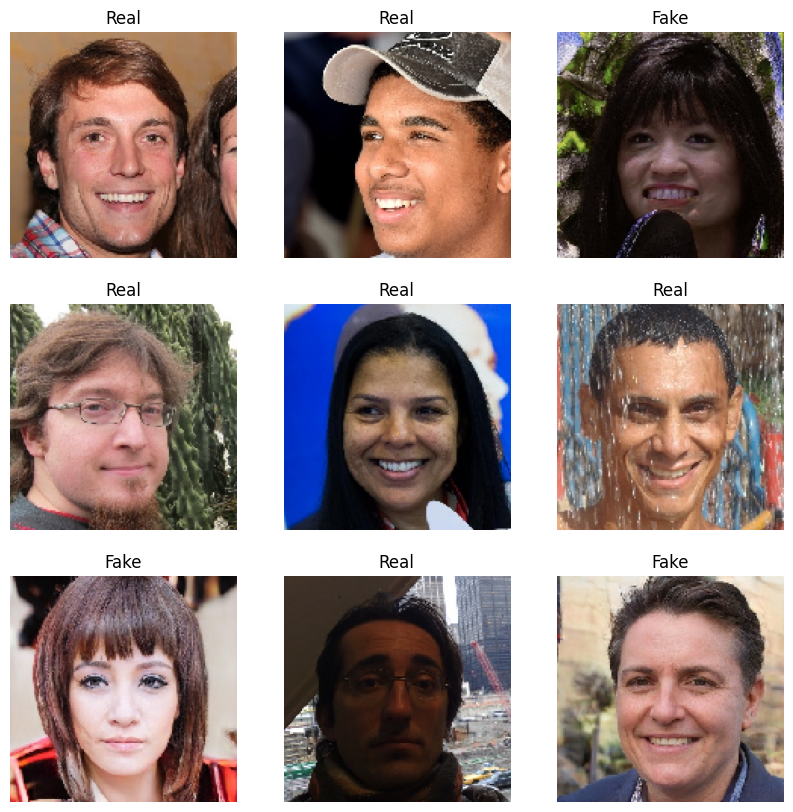

In [33]:
plt.figure(figsize=(10, 10))
for i in range(9):
    img, label = train_generator.next()
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img[0])
    if(label[0] == 0.0):
        plt.title("Fake")
    else:
        plt.title("Real")
    plt.axis("off")

## Model architecture

In [8]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(1064, activation='relu'),
     tf.keras.layers.Dense(2, activation='softmax')
    ]
)

In [9]:
# x = tf.keras.layers.Conv2D(16, activation='relu', kernel_size=3, input_shape=(75, 75, 1))(inputs)
# x = tf.keras.layers.AveragePooling2D((2, 2))(x)

# x = tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu')(x)
# x = tf.keras.layers.AveragePooling2D((2, 2))(x)

# x = tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu')(x)
# x = tf.keras.layers.AveragePooling2D((2, 2))(x)

# x = tf.keras.layers.flatten()(x)

## Visualizing network architectures

In [34]:
tf.keras.utils.pydot = pydot

In [35]:
plot_model(model, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


#### Model summary

View all the layers of the network using the model's summary method:

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

#### Compile and train the model

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [38]:
%%time
history = model.fit(train_generator, validation_data = validation_generator, epochs = 10, validation_steps = 50, verbose=1)

Epoch 1/10
1000/1000 [==============================] - 2333s 2s/step - loss: 0.5267 - accuracy: 0.7367 - val_loss: 0.3959 - val_accuracy: 0.8242
Epoch 2/10
1000/1000 [==============================] - 2426s 2s/step - loss: 0.3085 - accuracy: 0.8681 - val_loss: 0.2776 - val_accuracy: 0.8832
Epoch 3/10
1000/1000 [==============================] - 3272s 3s/step - loss: 0.1740 - accuracy: 0.9300 - val_loss: 0.1964 - val_accuracy: 0.9202
Epoch 4/10
1000/1000 [==============================] - 2254s 2s/step - loss: 0.0933 - accuracy: 0.9643 - val_loss: 0.1978 - val_accuracy: 0.9242
Epoch 5/10
1000/1000 [==============================] - 2208s 2s/step - loss: 0.0521 - accuracy: 0.9809 - val_loss: 0.1656 - val_accuracy: 0.9396
Epoch 6/10
1000/1000 [==============================] - 7794s 8s/step - loss: 0.0332 - accuracy: 0.9879 - val_loss: 0.2555 - val_accuracy: 0.9348
Epoch 7/10
1000/1000 [==============================] - 2719s 3s/step - loss: 0.0287 - accuracy: 0.9897 - val_loss: 0.2133 -

#### Visualize training results

In [14]:
#VISUAL REPRESENTATION
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper right')
# plt.show()


# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper right')
# plt.show()

### Evaluate the model on the test data via evaluate():

In [15]:
test_loss, test_acc = model.evaluate(test_generator)

200/200 [==============================] - 262s 1s/step - loss: 0.6939 - accuracy: 0.5024


In [38]:
class_names = ['fake', 'real']

#### Predict on new data

In [44]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array 

# Load the image properly
test_image = load_img(r"C:\Users\Anurag Bisht\Desktop\Real-and-Fake-Image-Classsification-master\real-vs-fake\test\real\00152.jpg", target_size=(150, 150))

# Convert image to array
test_image = img_to_array(test_image)

# Expand dimensions to match model input
test_image = np.expand_dims(test_image, axis=0)

# Predict using model
result = model.predict(test_image)

print(result)


1/1 [==============================] - 0s 66ms/step
[[9.9999917e-01 8.0578781e-07]]


In [45]:
print(
    "This image is {} with a {:.2f} percentage."
    .format(class_names[np.argmax(result)], 100 * np.max(result))
)

This image is fake with a 100.00 percentage.


In [46]:
model.save('Authentiseeeee.h5')